In [3]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [4]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [10]:
df_analyse.Germany[36]

26

In [18]:
N0 = 1000000
beta = 0.4
gamma = 0.1 

I0 = df_analyse.Germany[25]
S0 = N0 - I0
R0 = 0



In [19]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [22]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

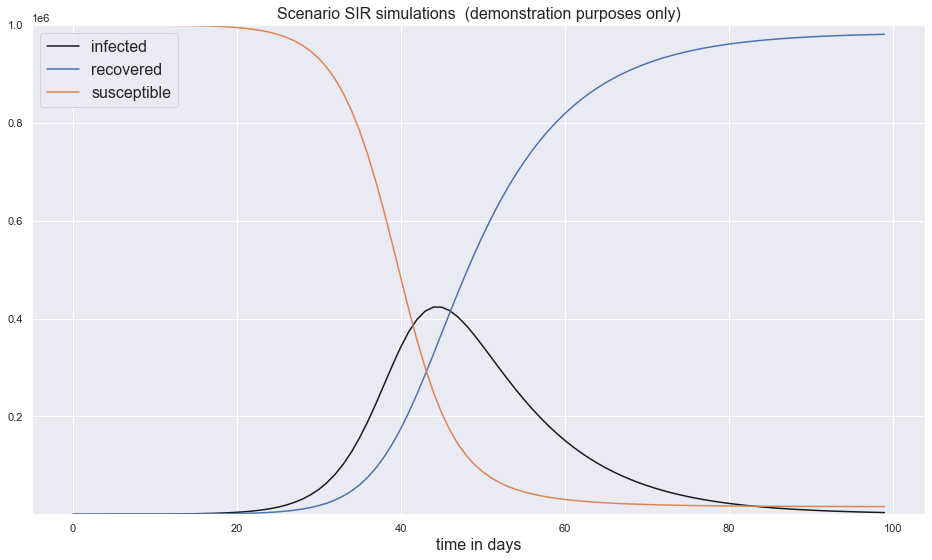

In [24]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [28]:
ydata = np.array(df_analyse.Germany[25:])
t=np.arange(len(ydata))

In [30]:
# ensure re-initialization 
I0=ydata[0]
S0=1000000
R0=0
beta

0.4

In [31]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [32]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [33]:
popt= [0.4, 0.1]
fit_odeint(t, *popt)

array([ 1.60000000e+01,  2.15977104e+01,  2.91537168e+01,  3.93530237e+01,
        5.31201788e+01,  7.17029841e+01,  9.67854143e+01,  1.30639895e+02,
        1.76332590e+02,  2.38000028e+02,  3.21221624e+02,  4.33520920e+02,
        5.85039262e+02,  7.89439841e+02,  1.06511833e+03,  1.43681951e+03,
        1.93778766e+03,  2.61261162e+03,  3.52096154e+03,  4.74244628e+03,
        6.38283686e+03,  8.58187537e+03,  1.15227748e+04,  1.54432351e+04,
        2.06472281e+04,  2.75157688e+04,  3.65131835e+04,  4.81828879e+04,
        6.31235931e+04,  8.19341789e+04,  1.05115647e+05,  1.32925698e+05,
        1.65199887e+05,  2.01182770e+05,  2.39441520e+05,  2.77938323e+05,
        3.14293563e+05,  3.46186440e+05,  3.71763089e+05,  3.89912368e+05,
        4.00336252e+05,  4.03435608e+05,  4.00092846e+05,  3.91438870e+05,
        3.78661808e+05,  3.62878595e+05,  3.45065370e+05,  3.26031632e+05,
        3.06421968e+05,  2.86732394e+05,  2.67332616e+05,  2.48489056e+05,
        2.30386014e+05,  